# EDA

**CARICAMENTO LIBRERIE E DATI**

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

**ESPLORAZIONE PRELIMINARE DEI DATI**

In [2]:
# Visualizzazione della forma, delle informazioni generali, delle statistiche descrittive.
print(f"Train shape: {train.shape}")
print(train.head())
print(train.info())
train.describe()

Train shape: (3960, 82)
         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_1

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [3]:
train.describe(include='object')

,id,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season
count,3960,3960,2555,3310,1308,3346,2145,475,1721,2736,2618,3540
unique,3960,4,4,4,4,4,4,4,4,4,4,4
top,00008ff9,Spring,Spring,Spring,Spring,Spring,Summer,Winter,Spring,Spring,Spring,Spring
freq,1,1127,697,929,385,993,669,137,506,762,712,985


In [4]:
# Visualizzazione del dataset di test.
print(f"Test shape: {test.shape}")
print(test.head())
print(test.info())
test.describe()

Test shape: (20, 59)
         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  BIA-BIA_TBW  PAQ

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
count,20.000000,20.000000,8.000000,13.000000,13.000000,13.000000,5.000000,11.000000,12.000000,11.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,1.00,9.000000,10.000000,10.00000,16.000000
mean,10.750000,0.400000,62.500000,19.835939,52.961538,79.200000,25.400000,70.545455,81.666667,117.545455,...,28.486750,15.457795,56.989275,25.985962,45.167825,1.04,2.372333,36.800000,52.30000,1.437500
std,3.725799,0.502625,11.275764,4.927625,6.942357,23.632181,3.130495,18.806189,9.316001,21.262002,...,5.099449,4.021153,14.490362,7.479799,11.940000,NaN,1.080099,5.533735,7.02456,1.152895
min,5.000000,0.000000,50.000000,14.035590,37.500000,46.000000,22.000000,57.000000,70.000000,95.000000,...,21.035200,8.895360,38.917700,15.410700,27.055200,1.04,1.100000,27.000000,40.00000,0.000000
25%,9.000000,0.000000,51.000000,16.861286,48.000000,60.200000,24.000000,60.500000,74.500000,102.500000,...,24.230725,13.815400,44.627250,19.801775,37.245575,1.04,1.270000,33.500000,47.75000,0.000000
50%,10.000000,0.000000,63.000000,18.292347,55.000000,81.600000,24.000000,63.000000,80.000000,116.000000,...,29.470400,16.402450,59.199050,26.337750,46.608850,1.04,2.340000,37.500000,53.50000,2.000000
75%,12.250000,1.000000,71.000000,21.079065,57.750000,85.600000,27.000000,73.000000,90.250000,119.500000,...,31.398725,17.674625,65.222050,30.421100,51.860475,1.04,3.020000,39.750000,55.75000,2.000000
max,19.000000,1.000000,80.000000,30.094649,60.000000,121.600000,30.000000,123.000000,97.000000,163.000000,...,36.057200,20.902000,79.698200,36.223200,63.126500,1.04,4.110000,46.000000,64.00000,3.000000


In [5]:
test.describe(include='object')

,id,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,SDS-Season,PreInt_EduHx-Season
count,20,20,10,14,4,17,8,1,9,10,18
unique,20,4,4,4,3,4,3,1,4,4,4
top,00008ff9,Fall,Summer,Fall,Spring,Fall,Fall,Summer,Fall,Fall,Fall
freq,1,6,5,6,2,6,3,1,3,3,6


**DISTRIBUZIONE SII**


Distribuzione dei valori unici:
sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64
Distribuzione dei valori di 'sii' con percentuali:
Valore: 0.0, Percentuale: 40.25%
Valore: NaN, Percentuale: 30.91%
Valore: 1.0, Percentuale: 18.43%
Valore: 2.0, Percentuale: 9.55%
Valore: 3.0, Percentuale: 0.86%


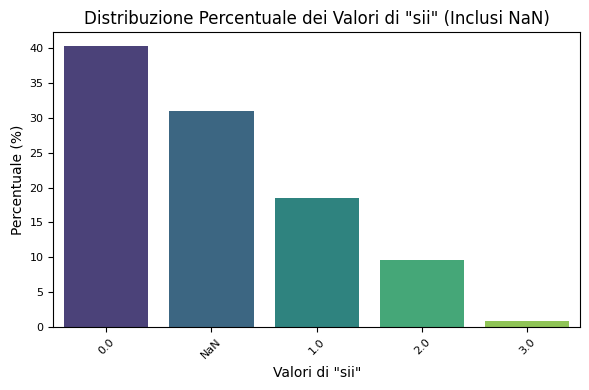

In [6]:
# Calcolo e visualizzazione della distribuzione dei valori unici della colonna 'sii', comprese le percentuali e i valori NaN.
print("\nDistribuzione dei valori unici:")
print(train['sii'].value_counts())  # Conta i valori unici della colonna 'sii'

# Calcolo dei conteggi e delle percentuali per la colonna 'sii', inclusi i valori NaN
sii_value_counts = train['sii'].value_counts(dropna=False) 
sii_percentage = (sii_value_counts / len(train)) * 100

# Creazione di un dataframe per visualizzare le percentuali
sii_stats_df = sii_percentage.reset_index()
sii_stats_df.columns = ['sii', 'Percentage']

# Conversione dei valori nan in una stringa per una migliore leggibilità
sii_stats_df['sii'] = sii_stats_df['sii'].fillna('NaN')

# Ordinamento dei valori per percentuale
sii_stats_df = sii_stats_df.sort_values(by='Percentage', ascending=False)

# Stampa dei risultati
print("Distribuzione dei valori di 'sii' con percentuali:")
for _, row in sii_stats_df.iterrows():
    print(f"Valore: {row['sii']}, Percentuale: {row['Percentage']:.2f}%")

# Creazione del grafico per visualizzare la distribuzione percentuale dei valori di 'sii'
plt.figure(figsize=(6, 4)) 
sns.barplot(
    data=sii_stats_df, 
    x='sii', 
    y='Percentage', 
    palette='viridis'
)
plt.title('Distribuzione Percentuale dei Valori di "sii" (Inclusi NaN)', fontsize=12)
plt.xlabel('Valori di "sii"', fontsize=10)
plt.ylabel('Percentuale (%)', fontsize=10)
plt.xticks(rotation=45, fontsize=8) 
plt.yticks(fontsize=8) 
plt.tight_layout()  
plt.show()

**PRESNZA NAN**


Percentuale di NaN per colonna di train:
id                                         0.000000
Basic_Demos-Enroll_Season                  0.000000
Basic_Demos-Age                            0.000000
Basic_Demos-Sex                            0.000000
CGAS-Season                               35.479798
                                            ...    
SDS-SDS_Total_Raw                         34.116162
SDS-SDS_Total_T                           34.191919
PreInt_EduHx-Season                       10.606061
PreInt_EduHx-computerinternet_hoursday    16.641414
sii                                       30.909091
Length: 82, dtype: float64

Percentuale media di NaN di train: 40.56%
Percentuale di NaN per colonna di test:
id                                         0.0
Basic_Demos-Enroll_Season                  0.0
Basic_Demos-Age                            0.0
Basic_Demos-Sex                            0.0
CGAS-Season                               50.0
CGAS-CGAS_Score                           

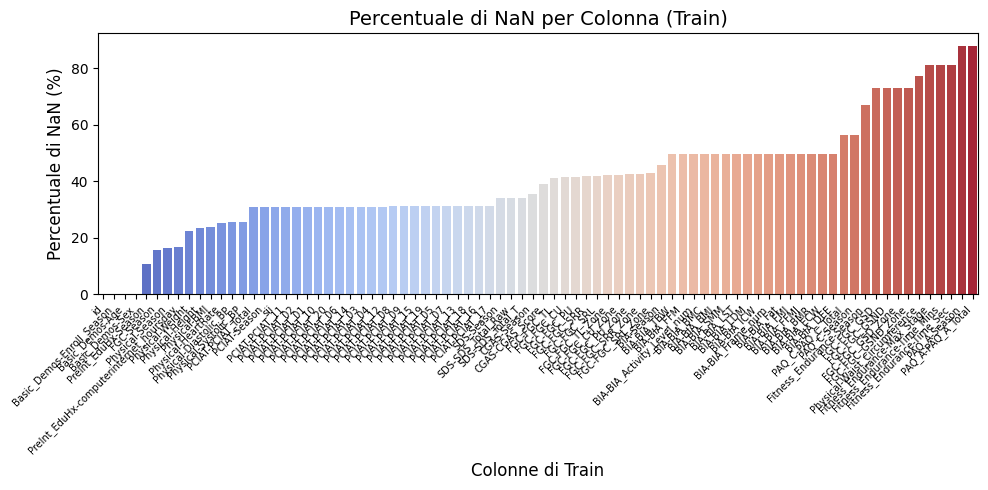

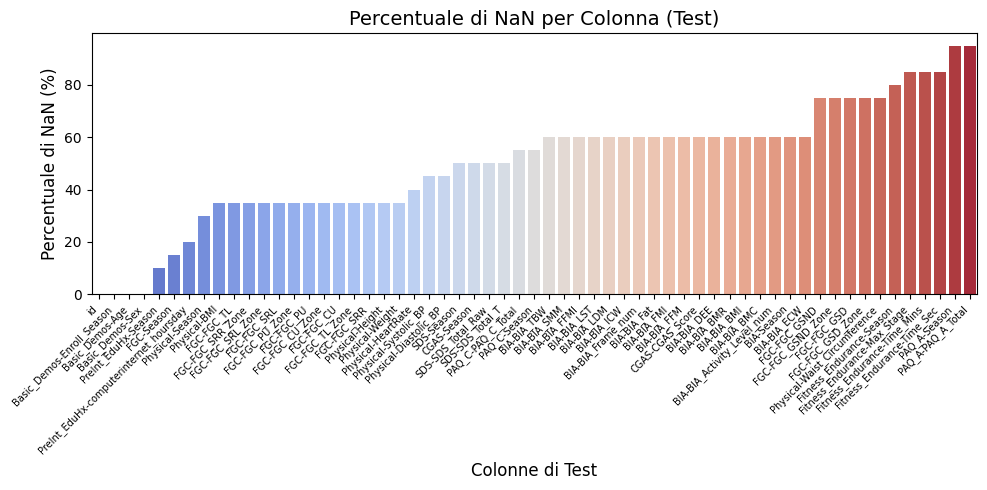

In [7]:
# Calcolo della percentuale di valori NaN in ciascuna colonna di train
percentuale_nan_train = train.isnull().mean() * 100
percentuale_nan_media_train = train.isnull().mean().mean() * 100

print("Percentuale di NaN per colonna di train:")
print(percentuale_nan_train)
print(f"\nPercentuale media di NaN di train: {percentuale_nan_media_train:.2f}%")

# Calcolo della percentuale di valori NaN in ciascuna colonna di test
percentuale_nan_test = test.isnull().mean() * 100
percentuale_nan_media_test = test.isnull().mean().mean() * 100

print("Percentuale di NaN per colonna di test:")
print(percentuale_nan_test)
print(f"\nPercentuale media di NaN di test: {percentuale_nan_media_test:.2f}%")

# percentuali di NaN in ordine crescente
percentuale_nan_train = percentuale_nan_train.sort_values(ascending=True)
percentuale_nan_test = percentuale_nan_test.sort_values(ascending=True)


# Grafico 1: Percentuali di NaN  di train
plt.figure(figsize=(10, 5))  # Dimensioni aumentate per il grafico di train
sns.barplot(x=percentuale_nan_train.index, y=percentuale_nan_train.values, palette='coolwarm')
plt.title('Percentuale di NaN per Colonna (Train)', fontsize=14)
plt.xlabel('Colonne di Train', fontsize=12)
plt.ylabel('Percentuale di NaN (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=7) 
plt.tight_layout()
plt.show()

# Grafico 2: Percentuali di NaN  di test
plt.figure(figsize=(10, 5))  
sns.barplot(x=percentuale_nan_test.index, y=percentuale_nan_test.values, palette='coolwarm')
plt.title('Percentuale di NaN per Colonna (Test)', fontsize=14)
plt.xlabel('Colonne di Test', fontsize=12)
plt.ylabel('Percentuale di NaN (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=7)  # Riduzione font per nomi delle feature
plt.tight_layout()
plt.show()


**COLONNE NON COMUNI**

In [8]:
print('Colonne mancanti in test:')
print([f for f in train.columns if f not in test.columns])

Colonne mancanti in test:
['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii']


**CORRELAZIONE CON IL SII**

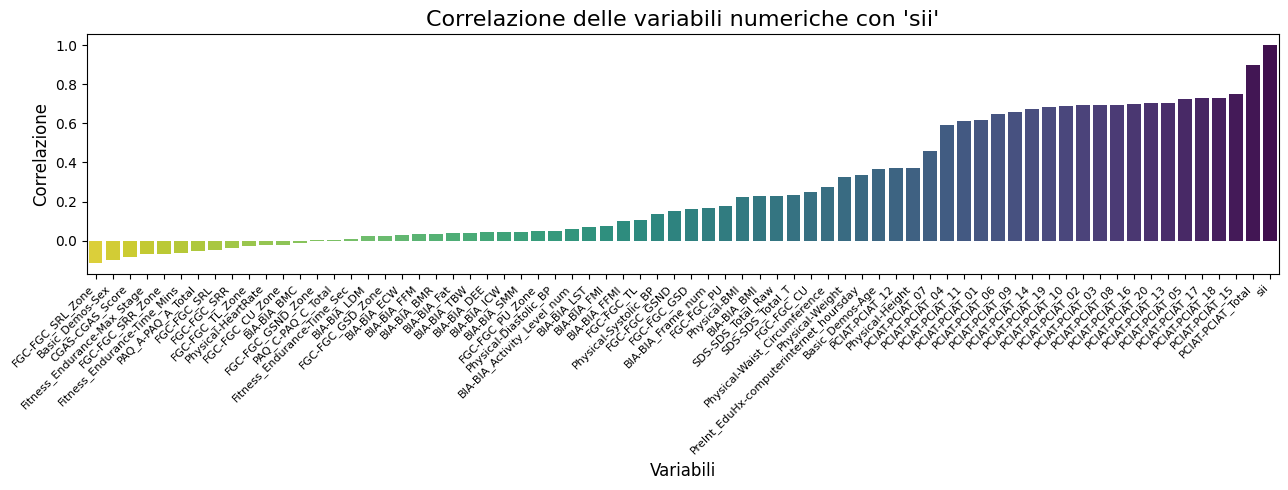

In [9]:
# Selezione delle variabili numeriche e calcolo della matrice di correlazione con 'sii'.
numerical_df = train.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()  # Calcola la matrice di correlazione
corr = correlation_matrix['sii'].sort_values(ascending=False)  # Ordina le correlazioni con 'sii'
corr_df = pd.DataFrame(corr)

# correlazioni con 'sii' dal meno al più correlato
plt.figure(figsize=(13, 5))
sns.barplot(
    x=corr_df.index,
    y=corr_df['sii'],
    palette='viridis'
)

plt.gca().invert_xaxis()

plt.title("Correlazione delle variabili numeriche con 'sii'", fontsize=16)
plt.xlabel("Variabili", fontsize=12)
plt.ylabel("Correlazione", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


**VALORI NEGATIVI**

In [10]:
#Selezione delle colonne numeriche
numerical_train = train.select_dtypes(include='number')
numerical_test = test.select_dtypes(include='number')

#Controllo per train
negative_columns_train = numerical_train.columns[(numerical_train < 0).any()]
print(f"Colonne con valori negativi in 'train': {negative_columns_train.tolist()}")


Colonne con valori negativi in 'train': ['BIA-BIA_BMC', 'BIA-BIA_FMI', 'BIA-BIA_Fat']


# PULIZIA E PREPARAZIONE DEI DATI

In [11]:
# soglia di valori mancanti per l'eliminazione
soglia_nan = 80

train = train.loc[:, train.isnull().mean() < soglia_nan / 100]

print(f"Colonne rimanenti in train dopo l'eliminazione: {train.shape[1]}")


Colonne rimanenti in train dopo l'eliminazione: 77


**DIVISIONE SET**

In [12]:
# Suddivisione in training e test set (80% train, 20% test)
train, train_test = train_test_split(train, test_size=0.2, random_state=42)
train_test = train_test.dropna(subset=['sii'])

In [13]:
train_x = train.drop(columns=['id'])
test_x = test.drop(columns=['id'])
train_test = train_test.drop(columns=['id'])

# Ottienimento delle colonne comuni tra train e test
common_columns = [col for col in train_x.columns if col in test_x.columns]


train_y = train['sii']
train_x = train_x[common_columns]

train_test_y = train_test['sii']
train_test_x = train_test[common_columns]

test_x = test_x[common_columns]


print(f"dimensioni train_test_y: {train_test_y.shape}")
print(f"dimensioni train_test_x: {train_test_x.shape}")
print(f"dimensioni train_y: {train_y.shape}")
print(f"dimensioni train_x: {train_x.shape}")
print(f"dimensioni test_x: {test_x.shape}")

dimensioni train_test_y: (543,)
dimensioni train_test_x: (543, 53)
dimensioni train_y: (3168,)
dimensioni train_x: (3168, 53)
dimensioni test_x: (20, 53)


**MAPPING COLONNE CATEGORIALI DELLE STAGIONI**

In [14]:
# Identifica le colonne categoriali
categorical_train = train_x.select_dtypes(include=['object', 'category']).columns.tolist()

# Mappatura per le stagioni
season_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Fall': 2,
    'Winter': 3
}

pd.options.mode.chained_assignment = None
# Applicazione mappatura su tutte le colonne categoriali
for col in categorical_train:
    train_x[col] = train_x[col].map(season_mapping).astype('float64')
    train_test_x[col] = train_test_x[col].map(season_mapping).astype('float64')
    test_x[col] = test_x[col].map(season_mapping).astype('float64')

# Verifica i cambiamenti nel tipo di dato
print(train_x.dtypes)
print(test_x.dtypes)
print(train_test_x.dtypes)


Basic_Demos-Enroll_Season                 float64
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                               float64
CGAS-CGAS_Score                           float64
Physical-Season                           float64
Physical-BMI                              float64
Physical-Height                           float64
Physical-Weight                           float64
Physical-Waist_Circumference              float64
Physical-Diastolic_BP                     float64
Physical-HeartRate                        float64
Physical-Systolic_BP                      float64
Fitness_Endurance-Season                  float64
FGC-Season                                float64
FGC-FGC_CU                                float64
FGC-FGC_CU_Zone                           float64
FGC-FGC_GSND                              float64
FGC-FGC_GSND_Zone                         float64
FGC-FGC_GSD                               float64


**OUTLIERS**

In [15]:
columns_to_check = [
    'Physical-Height', 'Physical-Weight', 'Physical-BMI',
    'Physical-Systolic_BP', 'Physical-Diastolic_BP', 'Physical-HeartRate', 
    'CGAS-CGAS_Score', 'BIA-BIA_BMC', 'BIA-BIA_FMI', 'BIA-BIA_Fat']

# Funzione per trovare gli outliers utilizzando la Z-score
def find_outliers_zscore(df, columns):
    outliers = {}
    for col in columns:
        # Calcolo Z-score senza rimuovere i NaN, così che l'indice rimanga allineato
        z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))  # 'omit' per ignorare NaN
        # Selezione degli outliers dove la Z-score è maggiore di 3
        outliers[col] = df[z_scores > 3]
    return outliers

# Outliers con Z-score
train_outliers_zscore = find_outliers_zscore(train_x, columns_to_check)

print("Outliers con Z-score nel dataset di addestramento:")
for col, outliers in train_outliers_zscore.items():
    print(f"{col}: {len(outliers)} outliers")

Outliers con Z-score nel dataset di addestramento:
Physical-Height: 0 outliers
Physical-Weight: 40 outliers
Physical-BMI: 47 outliers
Physical-Systolic_BP: 38 outliers
Physical-Diastolic_BP: 35 outliers
Physical-HeartRate: 8 outliers
CGAS-CGAS_Score: 1 outliers
BIA-BIA_BMC: 1 outliers
BIA-BIA_FMI: 20 outliers
BIA-BIA_Fat: 1 outliers


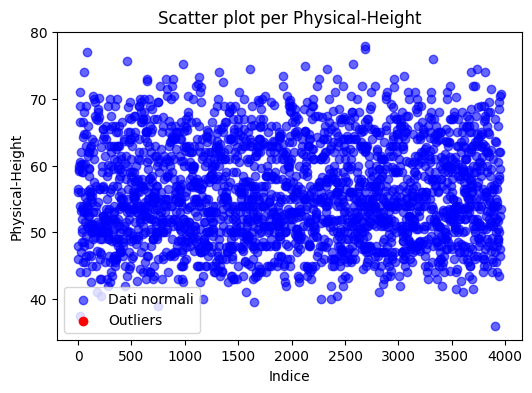

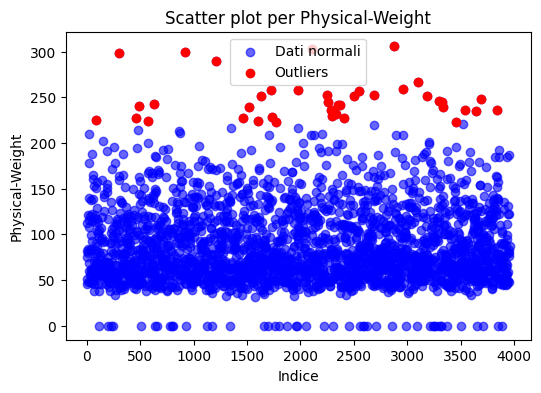

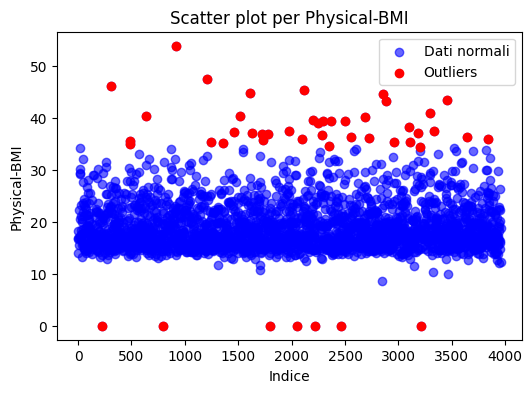

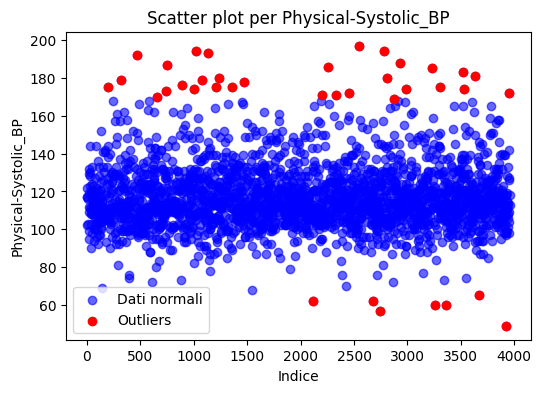

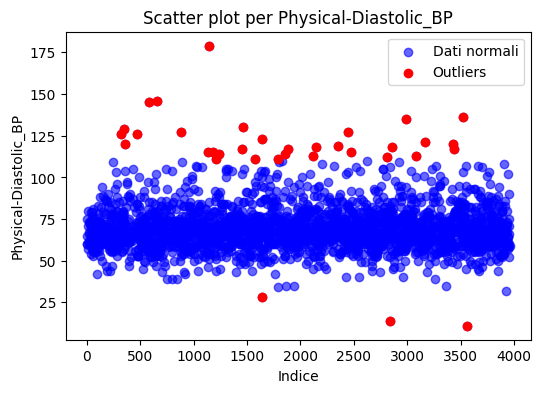

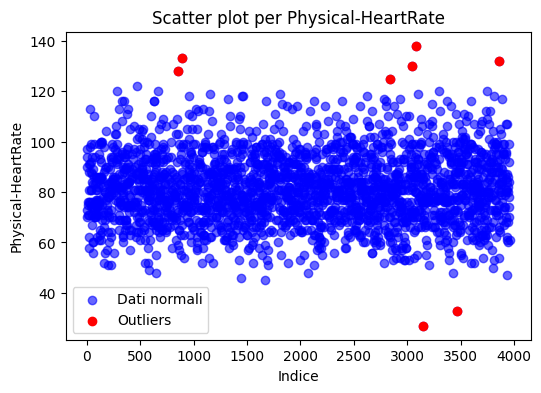

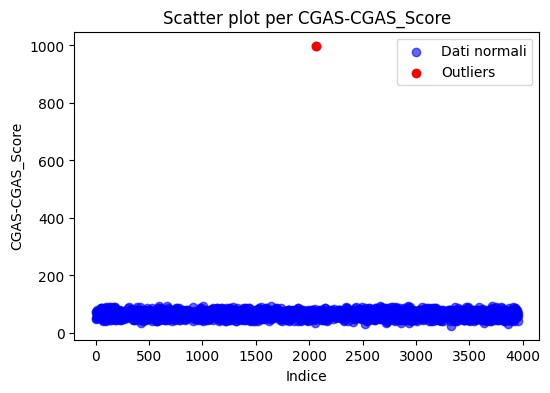

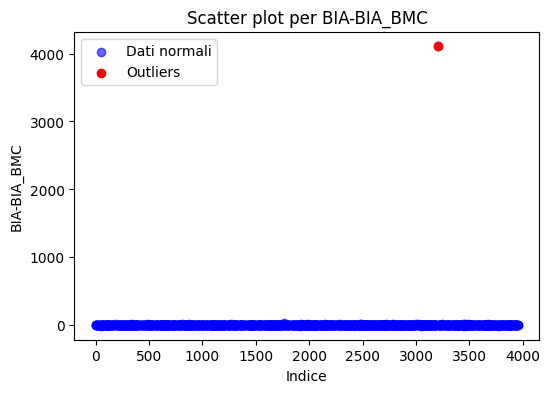

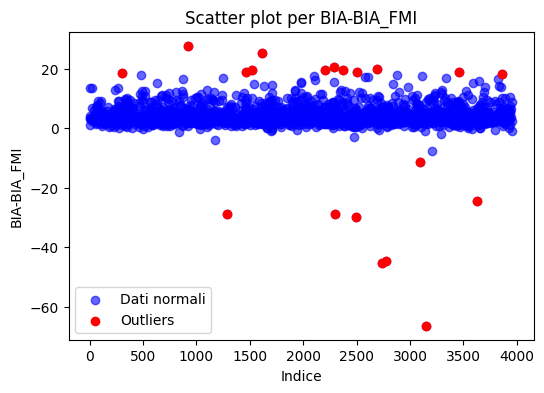

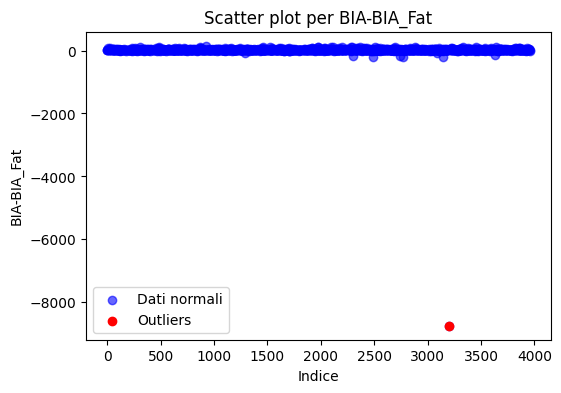

In [16]:
# Funzione per creare scatter plot per le colonne selezionate
def plot_outliers_scatter(df, columns):
    for col in columns:
        # Individuazione degli outliers in base alla Z-score > 3
        z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
        outliers = df[z_scores > 3]
        plt.figure(figsize=(6, 4))
        plt.scatter(df.index, df[col], label='Dati normali', color='blue', alpha=0.6)
        plt.scatter(outliers.index, outliers[col], label='Outliers', color='red')
        plt.title(f"Scatter plot per {col}")
        plt.xlabel('Indice')
        plt.ylabel(col)
        plt.legend()
        plt.show()

plot_outliers_scatter(train_x, columns_to_check)


In [17]:
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.width', 1000)  # Larghezza massima della visualizzazione

# Funzione per trovare e restituire gli outliers con le colonne selezionate
def find_outliers(df, columns, selected_columns):
    outliers = {}
    for col in columns:
        # Calcolo degli Z-score
        z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
        
        # Identificazione degli outliers (valori con Z-score > 3)
        outliers_data = df[z_scores > 3]
        
        # Solo le colonne richieste
        outliers[col] = outliers_data[selected_columns] if not outliers_data.empty else pd.DataFrame()
    
    return outliers



# Colonne di interesse per l'output
selected_columns = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
                    'Physical-HeartRate', 'Physical-Systolic_BP', 'BIA-BIA_BMC', 'BIA-BIA_FMI', 'BIA-BIA_Fat']

# Outliers per il train_x
outliers_train = find_outliers(train_x, columns_to_check, selected_columns)

# Visualizzazione degli outliers per ogni colonna
for col, outlier_data in outliers_train.items():
    print(f"\nOutliers per {col}:")
    if not outlier_data.empty:
        print(outlier_data.to_string(index=False)) 
    else:
        print("Nessun outlier trovato.")



Outliers per Physical-Height:
Nessun outlier trovato.

Outliers per Physical-Weight:
 Basic_Demos-Age  Basic_Demos-Sex  Physical-BMI  Physical-Height  Physical-Weight  Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  BIA-BIA_BMC  BIA-BIA_FMI  BIA-BIA_Fat
              16                0     29.284014            74.50            231.2                   64.0                79.0                 119.0      8.33688      9.54184      75.3255
              17                0     36.354083            70.50            257.0                   73.0                63.0                 134.0      8.09656     11.82400      83.5875
              16                1     39.337793            64.00            229.2                   70.0                83.0                 125.0      5.31220     20.48530     119.3440
              15                0     33.104936            69.00            224.2                   97.0                87.0                 163.0      7.88209      8.621

In [18]:
# Dizionario con le condizioni per sostituire i valori con NaN
columns_conditions = {
    'BIA-BIA_BMC': train_x['BIA-BIA_BMC'] < 0,
    'BIA-BIA_FMI': train_x['BIA-BIA_FMI'] < 0,
    'BIA-BIA_Fat': train_x['BIA-BIA_Fat'] < 0,
    'Physical-BMI': (train_x['Physical-BMI'] > 46) | (train_x['Physical-BMI'] == 0),
    'Physical-Height': (train_x['Physical-Height'] > 78) | (train_x['Physical-Height'] < 34),
    'Physical-Weight': (train_x['Physical-Weight'] > 300) | (train_x['Physical-Weight'] < 20),
    'Physical-Diastolic_BP': (train_x['Physical-Diastolic_BP'] > 125) | (train_x['Physical-Diastolic_BP'] < 30),
    'Physical-HeartRate': (train_x['Physical-HeartRate'] > 120) | (train_x['Physical-HeartRate'] < 40),
    'Physical-Systolic_BP': (train_x['Physical-Systolic_BP'] > 175) | (train_x['Physical-Systolic_BP'] < 50),
    'CGAS-CGAS_Score': train_x['CGAS-CGAS_Score'] > 900
}

# Sostituzione dei valori non validi con NaN
for col, condition in columns_conditions.items():
    train_x.loc[condition, col] = np.nan

train_x.describe()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
count,3168.000000,3168.000000,3168.000000,2040.000000,1937.000000,2644.000000,2419.000000,2434.000000,2420.000000,721.000000,2364.000000,2379.000000,2360.000000,1061.000000,2675.000000,1866.000000,1832.000000,864.000000,855.000000,864.000000,856.000000,1857.000000,1824.000000,1850.000000,1818.000000,1852.000000,1820.000000,1867.000000,1834.000000,1712.000000,1587.000000,1559.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1558.000000,1558.000000,1587.000000,1587.00000,1587.000000,1587.000000,1587.000000,1587.000000,1385.000000,1385.000000,2104.000000,2096.000000,2094.000000,2827.000000,2640.000000
mean,1.428662,10.413826,0.375631,1.431373,64.981931,1.438729,19.316197,55.894692,90.316835,27.280652,69.489002,81.421185,116.609746,1.459001,1.376449,11.427653,0.479803,22.535359,1.828070,23.499653,1.899533,5.688745,0.342105,8.645216,0.606711,8.758612,0.610989,9.321907,0.792257,1.393107,2.654694,7.186435,19.294448,1239.722082,2069.763157,21.008489,74.309710,14.909957,4.661093,22.755410,1.742911,33.17538,20.125847,67.281905,34.310686,54.183869,1.435379,2.600683,1.449144,41.100668,57.789398,1.456314,1.043561
std,1.147185,3.547079,0.484362,1.107820,11.819763,1.130373,4.816914,7.456426,42.288180,5.555032,12.581023,13.296008,16.060050,1.159646,1.123609,12.162941,0.499728,11.002750,0.608032,10.983109,0.605395,7.486989,0.474545,3.491587,0.488615,3.456924,0.487660,2.969060,0.405802,1.034879,1.045851,104.140258,4.934276,2075.676166,3137.235623,81.419893,221.087163,3.572995,3.348135,19.944008,0.676160,61.93954,77.968395,119.438906,91.521257,143.246628,1.174287,0.783091,1.127312,10.470774,13.273198,1.145988,1.088364
min,0.000000,5.000000,0.000000,0.000000,25.000000,0.000000,8.522436,36.000000,31.800000,18.000000,32.000000,45.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.009889,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,0.066924,0.386662,1.000000,14.48900,4.635810,23.947300,4.655730,20.589200,0.000000,0.580000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,58.000000,0.000000,15.915537,50.000000,58.600000,23.000000,61.000000,72.000000,107.000000,0.000000,0.000000,3.000000,0.000000,15.200000,1.000000,16.175000,2.000000,0.000000,0.000000,6.500000,0.000000,6.737500,0.000000,7.000000,1.000000,1.000000,2.000000,3.024975,15.958550,1007.255000,1600.315000,11.176700,49.548850,13.430050,2.381000,9.067718,1.000000,24.49255,13.002650,45.160850,21.273450,36.093500,0.000000,2.050000,0.000000,33.000000,47.000000,0.000000,0.000000
50%,1.000000,10.000000,0.000000,1.000000,65.000000,1.000000,17.964551,55.000000,77.600000,26.000000,68.000000,81.000000,114.000000,2.000000,1.000000,9.000000,0.000000,20.000000,2.000000,21.200000,2.000000,3.000000,0.000000,9.000000,1.000000,9.000000,1.000000,10.000000,1.000000,1.000000,3.000000,3.937490,17.962500,1115.850000,1857.080000,16.036600,61.115200,14.098800,3.725530,16.592050,2.000000,28.85720,16.418400,57.124000,27.421900,45.147700,1.000000,2.580000,1.000000,39.000000,55.000000,1.000000,1

**IMPUTAZIONE KNN**

In [19]:
# KNNImputer per l'imputazione dei valori mancanti
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Imputazione e fit sui dati di training
train_x_imputed = knn_imputer.fit_transform(train_x)

# dataframe con indici originali
train_x = pd.DataFrame(train_x_imputed, columns=train_x.columns, index=train_x.index)
test_x = pd.DataFrame(knn_imputer.transform(test_x), columns=test_x.columns, index=test_x.index)
train_test_x = pd.DataFrame(knn_imputer.transform(train_test_x), columns=train_test_x.columns, index=train_test_x.index)

print("Train shape dopo imputazione:", train_x.shape)
print("Test shape dopo imputazione:", test_x.shape)
print("Train_test_x shape dopo imputazione:", train_test_x.shape)


Train shape dopo imputazione: (3168, 53)
Test shape dopo imputazione: (20, 53)
Train_test_x shape dopo imputazione: (543, 53)


**IMPUTAZIONE Y**

In [20]:
# Dividisione train_y in dati completi per addestrare il modello e mancanti su cui fare le previsioni
mask = train_y.notna()  # True se non è NaN, False se è NaN
train_y_complete = train_y[mask]
train_x_complete = train_x[mask]
train_x_missing = train_x[~mask]

# Addestramento del modello
model = MultinomialNB()
model.fit(train_x_complete, train_y_complete)

# Previsioni sui valori mancanti
train_y_predicted = model.predict(train_x_missing)

# Sostituzione dei valori mancanti
train_y_imputed = train_y.copy()
train_y_imputed.loc[~mask] = train_y_predicted
train_y=train_y_imputed

print("Distribuzione dei valori dopo imputazione:")
print(train_y.value_counts())


Distribuzione dei valori dopo imputazione:
sii
0.0    1799
1.0     695
2.0     475
3.0     199
Name: count, dtype: int64


**RECURSIVE FEATURE ELIMINATION**

Numero di caratteristiche selezionate: 41
Caratteristiche selezionate:
Index(['Basic_Demos-Age', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'SDS-Season', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'], dtype='object')


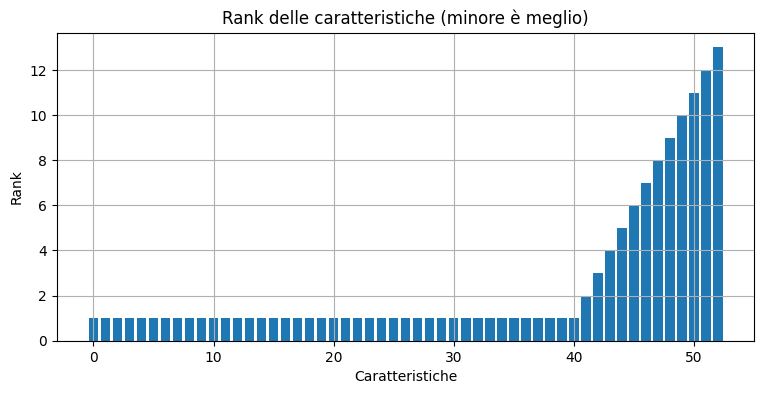

In [21]:

# Creazione modello RandomForest
rf = RandomForestClassifier(n_estimators=100)

#Applicazione RFECV
selector = RFECV(rf,
                 step=1,  # Numero di features rimosse ad ogni passo
                 cv=5,    # Cross-validation con 5 fold
                 scoring='accuracy',
                 min_features_to_select=1)  # Numero minimo di caratteristiche selezionabili
selector.fit(train_x, train_y)

print(f"Numero di caratteristiche selezionate: {selector.n_features_}")

print("Caratteristiche selezionate:")
print(train_x.columns[selector.support_]) 

# Visualizza il ranking delle caratteristiche
plt.figure(figsize=(9, 4))
plt.bar(range(train_x.shape[1]), sorted(selector.ranking_))
plt.title("Rank delle caratteristiche (minore è meglio)")
plt.xlabel('Caratteristiche')
plt.ylabel('Rank')
plt.grid(True)
plt.show()

# Trasforma train_x, test_x e train_test_x mantenendo i nomi delle colonne
train_x_selected = selector.transform(train_x)
test_x_selected = selector.transform(test_x)
train_test_x_selected = selector.transform(train_test_x)


train_x_selected_df = pd.DataFrame(train_x_selected, columns=train_x.columns[selector.support_])
test_x_selected_df = pd.DataFrame(test_x_selected, columns=test_x.columns[selector.support_])
train_test_x_selected_df = pd.DataFrame(train_test_x_selected, columns=train_test_x.columns[selector.support_])



# MODELLI PREDITTIVI


In [22]:
# divisione per validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [23]:
#funzione per le matrici di confusione
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred) 
    plt.figure(figsize=(4,3)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predetto")
    plt.ylabel("Reale")
    plt.title(title)
    plt.show()

In [24]:
#Funzione che analizza le previsioni del modello, mostrando solo i conteggi base e le top 5 con dettagli delle features
def analyze_predictions(model, X, y_true, feature_names=None):

    # Ottieni le previsioni e le probabilità
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X) #array che rappresenta la probabilità che quell'osservazione appartenga a una determinata classe in base al modello scelto
    
    # Crea un DataFrame con i dati originali
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(X.shape[1])]
    
    df = pd.DataFrame(X, columns=feature_names)
    df['true_label'] = y_true
    df['predicted_label'] = y_pred
    df['prediction_correct'] = y_true == y_pred
    df['prediction_confidence'] = np.max(y_proba, axis=1)
    
    # Analizza i casi corretti e sbagliati
    correct_cases = df[df['prediction_correct']]
    wrong_cases = df[~df['prediction_correct']]
    
    print(f"\nAnalisi delle previsioni:")
    print(f"Totale casi: {len(df)}")
    print(f"Previsioni corrette: {len(correct_cases)} ({len(correct_cases)/len(df)*100:.2f}%)")
    print(f"Previsioni sbagliate: {len(wrong_cases)} ({len(wrong_cases)/len(df)*100:.2f}%)")
    
    # Mostra le top 5 con tutti i dettagli delle feature usando display()
    print("\nTop 5 previsioni corrette con maggiore confidenza:")
    display(correct_cases.nlargest(5, 'prediction_confidence'))
    
    print("\nTop 5 previsioni sbagliate con maggiore confidenza:")
    display(wrong_cases.nlargest(5, 'prediction_confidence'))
    
    return correct_cases, wrong_cases

**RANDOM FOREST**

Validation Accuracy: 0.6403785488958991
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79       355
         1.0       0.41      0.23      0.29       141
         2.0       0.46      0.35      0.40        94
         3.0       0.60      0.59      0.60        44

    accuracy                           0.64       634
   macro avg       0.55      0.51      0.52       634
weighted avg       0.60      0.64      0.61       634



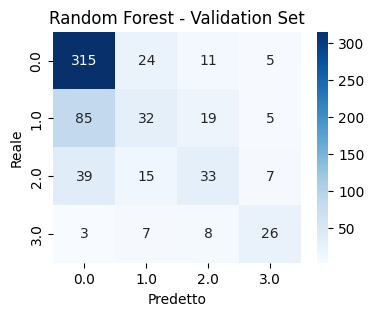

Random Forest Test Accuracy: 0.5985267034990792
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76       311
         1.0       0.41      0.20      0.27       148
         2.0       0.39      0.28      0.32        76
         3.0       0.17      0.25      0.20         8

    accuracy                           0.60       543
   macro avg       0.41      0.40      0.39       543
weighted avg       0.55      0.60      0.56       543



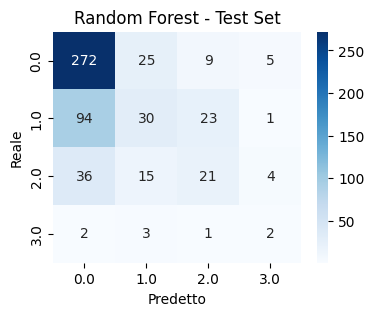

In [25]:
# inizializzazione modello standard
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf.fit(X_train_split, y_train_split)

# Valutazione su validation set
y_val_pred = rf.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_val_split, y_val_pred))
plot_confusion_matrix(y_val_split, y_val_pred, title="Random Forest - Validation Set")

# Valutazione su  test set
y_train_test_pred = rf.predict(train_test_x)
accuracy = accuracy_score(train_test_y, y_train_test_pred)

print(f"Random Forest Test Accuracy: {accuracy}")
# Generate a classification report
print("Classification Report:")
print(classification_report(train_test_y, y_train_test_pred))
# Generate a confusion matrix
plot_confusion_matrix(train_test_y, y_train_test_pred, title="Random Forest - Test Set")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Migliori parametri trovati: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Validation Accuracy: 0.6356466876971609
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.88      0.78       355
         1.0       0.43      0.23      0.30       141
         2.0       0.46      0.34      0.39        94
         3.0       0.62      0.59      0.60        44

    accuracy                           0.64       634
   macro avg       0.55      0.51      0.52       634
weighted avg       0.60      0.64      0.60       634



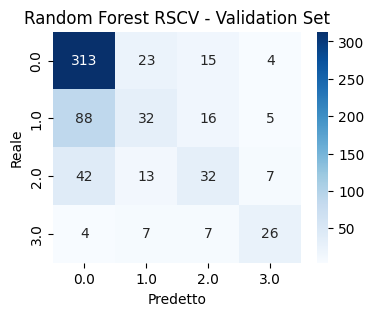

[[313  23  15   4]
 [ 88  32  16   5]
 [ 42  13  32   7]
 [  4   7   7  26]]
Test Accuracy: 0.6077348066298343
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77       311
         1.0       0.43      0.20      0.28       148
         2.0       0.44      0.29      0.35        76
         3.0       0.13      0.25      0.17         8

    accuracy                           0.61       543
   macro avg       0.42      0.41      0.39       543
weighted avg       0.57      0.61      0.57       543



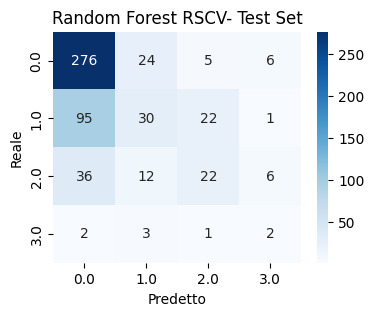

[[276  24   5   6]
 [ 95  30  22   1]
 [ 36  12  22   6]
 [  2   3   1   2]]


In [26]:
# Definizione della griglia degli iperparametri
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],  
    'max_depth': [10, 20, 30, 40, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]
}

# Creazione del modello Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Creazione della RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=30,  # Numero di combinazioni casuali da testare
    scoring='accuracy',  
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1 
)

# Esecuzione della ricerca
random_search.fit(X_train_split, y_train_split)
print("Migliori parametri trovati:", random_search.best_params_)

# Valutazione del modello ottimizzato
best_rf = random_search.best_estimator_

y_val_pred = best_rf.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred))
plot_confusion_matrix(y_val_split, y_val_pred, title="Random Forest RSCV - Validation Set")
print(confusion_matrix(y_val_split, y_val_pred))

# Valutazioone sul test set
y_train_test_pred = best_rf.predict(train_test_x)

accuracy = accuracy_score(train_test_y, y_train_test_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(train_test_y, y_train_test_pred))
plot_confusion_matrix(train_test_y, y_train_test_pred, title="Random Forest RSCV- Test Set")
print(confusion_matrix(train_test_y, y_train_test_pred))

In [27]:
print("Analisi Random Forest Test")
correct_rf, wrong_rf = analyze_predictions(
    best_rf,
    train_test_x, 
    train_test_y,  
    feature_names=X_train_split.columns if hasattr(X_train_split, 'columns') else None # inserisce i nomi delle colonne di train
)

Analisi Random Forest Test

Analisi delle previsioni:
Totale casi: 543
Previsioni corrette: 330 (60.77%)
Previsioni sbagliate: 213 (39.23%)

Top 5 previsioni corrette con maggiore confidenza:


,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,true_label,predicted_label,prediction_correct,prediction_confidence
1684,1.0,5.0,1.0,3.0,63.0,1.0,14.634076,42.50,37.6,21.0,60.0,99.0,100.0,1.4,1.0,0.0,0.0,14.90,2.0,14.66,1.8,0.0,0.0,10.0,1.0,10.0,1.0,7.0,1.0,1.0,2.0,1.960930,14.6357,875.7360,1313.600,8.14905,35.54030,13.83400,0.801718,2.05967,1.0,20.77730,6.613980,33.57940,20.31060,28.92640,1.0,2.616,0.6,39.6,56.0,1.0,0.0,0.0,0.0,True,0.96
429,1.0,7.0,1.0,3.0,85.0,2.0,14.002716,47.00,44.0,22.6,76.0,85.0,115.0,2.0,2.0,14.0,1.0,18.46,1.8,17.62,1.4,2.0,0.0,9.0,1.0,12.0,1.0,5.0,0.0,2.0,3.0,8.110030,14.0042,936.1690,1497.870,11.04720,41.97730,13.36050,0.643789,2.02272,1.0,20.89220,10.037900,33.86720,16.75400,31.93940,1.0,2.832,2.0,32.0,46.0,1.0,0.0,0.0,0.0,True,0.96
1831,2.0,7.0,1.0,3.0,90.0,3.0,16.084200,48.13,53.0,22.4,61.0,82.0,114.0,3.0,3.0,6.4,0.8,20.58,2.2,20.68,2.0,4.6,0.4,11.2,1.0,11.2,1.0,10.4,1.0,1.6,2.2,2.580488,17.0197,950.2604,1461.744,10.07714,43.47822,13.88296,3.136728,9.96177,2.4,23.24274,10.158316,40.89772,18.05834,33.31988,1.8,2.862,2.0,29.0,42.0,2.0,0.0,0.0,0.0,True,0.94
881,1.0,5.0,0.0,1.4,55.2,2.0,14.494456,48.25,48.0,22.4,74.0,78.0,121.0,2.0,2.0,3.6,0.4,18.52,2.2,18.00,1.8,3.8,0.4,11.5,0.8,10.8,0.8,8.0,1.0,1.6,2.2,2.580488,17.0197,950.2604,1461.744,10.07714,43.47822,13.88296,3.136728,9.96177,2.4,23.24274,10.158316,40.89772,18.05834,33.31988,0.6,2.686,2.0,33.0,47.0,1.0,0.0,0.0,0.0,True,0.94
554,2.0,9.0,0.0,1.0,69.0,2.0,15.016020,53.00,60.0,23.0,57.0,85.0,107.0,1.6,2.0,8.0,0.0,14.90,1.4,15.20,1.6,4.0,0.0,5.5,0.0,6.0,0.0,3.5,0.0,2.0,2.0,3.410460,15.0177,1035.2100,1656.340,11.67840,52.52690,13.14720,1.870480,7.47312,1.0,27.13510,13.713400,49.11640,23.48780,38.81350,3.0,2.720,2.0,34.0,49.0,2.0,1.0,0.0,0.0,True,0.94



Top 5 previsioni sbagliate con maggiore confidenza:


,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,true_label,predicted_label,prediction_correct,prediction_confidence
3954,1.0,7.0,1.0,1.6,64.2,1.0,13.927006,48.50,46.6,23.0,65.0,75.0,105.0,1.2,1.0,0.0,0.0,14.90,1.8,14.66,1.6,0.0,0.0,9.0,0.0,8.5,0.0,4.5,0.0,2.0,1.0,2.366800,13.64570,966.2870,1256.170,9.988020,45.18530,13.23150,0.414263,1.41470,1.0,20.05720,15.140000,42.81850,18.09370,30.04530,0.8,2.5100,1.0,48.0,67.0,1.0,0.0,1.0,0.0,False,1.00
3268,0.0,5.0,0.0,1.0,50.0,0.0,15.132003,43.75,41.2,21.0,77.0,107.0,124.0,1.0,0.0,2.0,1.0,14.78,2.0,13.18,1.6,0.0,0.0,11.0,1.0,14.0,1.0,8.0,1.0,1.0,2.0,2.319980,15.13370,877.4070,1403.850,5.487880,35.71830,13.12010,2.013540,5.48167,1.0,20.77470,9.455770,33.39840,13.84240,26.26260,0.0,2.4200,1.2,50.4,64.8,0.0,0.0,1.0,0.0,False,0.96
2830,1.0,8.0,1.0,2.0,50.0,1.0,17.317037,50.25,62.2,25.4,70.0,76.0,110.0,1.0,1.0,8.0,1.0,16.58,1.6,15.50,1.2,6.0,1.0,10.0,1.0,9.5,1.0,9.0,1.0,1.0,3.0,8.352110,17.31890,1003.7100,1605.930,13.832300,49.17120,13.69120,3.627720,13.02880,2.0,22.82890,12.510000,40.81910,20.63470,36.66120,1.0,1.9800,1.0,38.0,54.0,1.0,0.0,1.0,0.0,False,0.94
1945,3.0,5.0,0.0,0.0,55.0,3.0,16.485640,44.00,45.4,21.4,51.0,74.0,71.0,1.2,3.0,0.0,0.0,21.00,2.4,21.18,2.2,0.0,0.0,12.0,1.0,10.0,1.0,9.0,1.0,1.4,2.2,2.580488,17.01970,950.2604,1461.744,10.077140,43.47822,13.88296,3.136728,9.96177,2.4,23.24274,10.158316,40.89772,18.05834,33.31988,2.0,2.5798,0.0,45.0,63.0,3.0,0.0,2.0,0.0,False,0.94
321,1.0,7.0,0.0,3.0,60.0,2.0,13.913542,48.00,45.6,23.2,66.0,101.0,108.0,2.0,2.0,5.0,1.0,15.68,2.0,15.02,1.6,3.0,0.0,8.0,1.0,8.0,1.0,2.0,0.0,1.4,2.4,2.666232,18.20692,977.2406,1542.044,12.351336,46.35190,14.19112,4.015798,14.08811,2.6,23.75750,10.243036,43.68564,19.61508,36.10882,1.2,2.9700,2.0,42.0,59.0,1.0,0.0,1.0,0.0,False,0.92


**XGBOOST**

In [28]:
# Inizializzazione modello
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Addestramento
xgb.fit(X_train_split, y_train_split)

# Valutazione su validation set
y_val_pred = xgb.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"XGBoost Validation Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_val_split, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_split, y_val_pred))

#valutazione su test set
y_train_test_pred = xgb.predict(train_test_x)
accuracy_xgb = accuracy_score(train_test_y, y_train_test_pred)
print(f"XGBoost Test Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(classification_report(train_test_y, y_train_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(train_test_y, y_train_test_pred))

XGBoost Validation Accuracy: 0.6514195583596214
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       355
         1.0       0.43      0.30      0.36       141
         2.0       0.47      0.36      0.41        94
         3.0       0.59      0.59      0.59        44

    accuracy                           0.65       634
   macro avg       0.56      0.53      0.54       634
weighted avg       0.62      0.65      0.63       634

Confusion Matrix:
[[310  29  11   5]
 [ 76  43  17   5]
 [ 28  24  34   8]
 [  4   3  11  26]]
XGBoost Test Accuracy: 0.5948434622467772
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.86      0.76       311
         1.0       0.36      0.22      0.28       148
         2.0       0.41      0.26      0.32        76
         3.0       0.18      0.25      0.21         8

    accuracy                           0.59       543
   macro

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
XGBoost Validation Accuracy: 0.6703470031545742
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       355
         1.0       0.47      0.34      0.39       141
         2.0       0.51      0.38      0.44        94
         3.0       0.67      0.64      0.65        44

    accuracy                           0.67       634
   macro avg       0.60      0.56      0.57       634
weighted avg       0.64      0.67      0.65       634

Confusion Matrix:
[[313  28   9   5]
 [ 72  48  18   3]
 [ 29  23  36   6]
 [  4   4   8  28]]
XGBoost Test Accuracy: 0.6095764272559853
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79       311
         1.0       0.37      0.24  

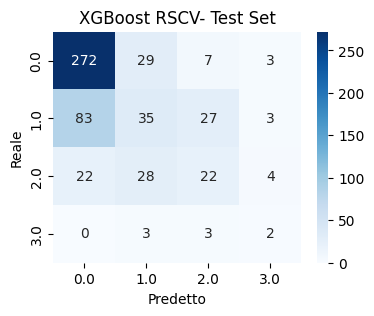

In [29]:
# Definizione dei parametri da esplorare
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train_split, y_train_split)

# Stampa i migliori parametri trovati
print("Best XGBoost Parameters:", random_search_xgb.best_params_)

# Valutazione validation set
y_val_pred = random_search_xgb.predict(X_val_split)
accuracy_xgb = accuracy_score(y_val_split, y_val_pred)
print(f"XGBoost Validation Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(classification_report(y_val_split, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_split, y_val_pred))

# Valutazione Test set
y_train_test_pred = random_search_xgb.predict(train_test_x)
accuracy_xgb = accuracy_score(train_test_y, y_train_test_pred)
print(f"XGBoost Test Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(classification_report(train_test_y, y_train_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(train_test_y, y_train_test_pred))
plot_confusion_matrix(train_test_y, y_train_test_pred, title="XGBoost RSCV- Test Set")

In [30]:
print("Analisi XGBoost Test")
correct_xgb, wrong_xgb = analyze_predictions(
    random_search_xgb,
    train_test_x,  
    train_test_y, 
    feature_names=X_train_split.columns if hasattr(X_train_split, 'columns') else None
)

Analisi XGBoost Test

Analisi delle previsioni:
Totale casi: 543
Previsioni corrette: 331 (60.96%)
Previsioni sbagliate: 212 (39.04%)

Top 5 previsioni corrette con maggiore confidenza:


,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,true_label,predicted_label,prediction_correct,prediction_confidence
1684,1.0,5.0,1.0,3.0,63.0,1.0,14.634076,42.50,37.6,21.0,60.0,99.0,100.0,1.4,1.0,0.0,0.0,14.90,2.0,14.66,1.8,0.0,0.0,10.0,1.0,10.0,1.0,7.0,1.0,1.0,2.0,1.96093,14.6357,875.736,1313.60,8.14905,35.5403,13.8340,0.801718,2.05967,1.0,20.7773,6.61398,33.5794,20.3106,28.9264,1.0,2.6160,0.6,39.6,56.0,1.0,0.0,0.0,0,True,0.978799
893,3.0,6.0,0.0,0.0,59.0,3.0,15.084744,47.00,47.4,22.8,42.0,91.0,98.0,1.2,3.0,1.0,0.0,15.14,1.6,15.30,1.8,3.0,1.0,12.0,1.0,12.5,1.0,6.0,1.0,3.0,3.0,2.73461,15.0864,932.515,1585.28,8.38636,41.5881,13.2366,1.849800,5.81190,1.0,23.6103,9.59140,38.8535,17.3586,31.9967,1.0,2.2418,0.0,32.0,46.0,3.0,0.0,0.0,0,True,0.971925
2550,1.0,6.0,1.0,3.0,55.0,1.0,14.977605,48.25,49.6,22.8,61.0,84.0,108.0,1.0,1.0,0.0,0.0,14.76,1.6,14.42,1.4,0.0,0.0,12.0,1.0,12.0,1.0,12.0,1.0,1.0,1.0,2.38196,14.9792,958.792,1246.43,11.17980,44.3870,13.4049,1.574340,5.21302,1.0,20.4583,12.74890,42.0050,16.6164,31.6381,0.6,2.7300,1.0,28.0,41.0,1.0,0.0,0.0,0,True,0.970900
1011,3.0,6.0,1.0,0.0,65.0,3.0,16.013516,46.00,48.2,23.4,62.0,98.0,91.0,3.0,3.0,3.0,1.0,14.78,1.8,15.42,2.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,1.0,0.0,2.0,2.10967,16.0153,936.901,1405.35,9.54797,42.0552,13.9736,2.041700,6.14477,2.0,19.3084,13.19890,39.9456,15.6396,28.8564,1.6,2.7218,3.0,51.0,71.0,3.0,0.0,0.0,0,True,0.968911
2835,1.0,7.0,0.0,0.0,55.0,2.0,14.991087,49.00,51.2,22.4,58.0,79.0,107.0,2.0,2.0,6.0,1.0,14.04,1.6,13.64,1.6,3.0,0.0,8.0,1.0,9.0,1.0,9.0,1.0,2.0,2.0,3.96299,14.9927,967.902,1548.64,8.61886,45.3573,13.2818,1.710910,5.84273,1.0,26.1229,10.61550,41.3943,25.5369,34.7418,0.8,2.8640,2.0,37.0,53.0,1.0,0.0,0.0,0,True,0.967071



Top 5 previsioni sbagliate con maggiore confidenza:


,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,true_label,predicted_label,prediction_correct,prediction_confidence
3954,1.0,7.0,1.0,1.6,64.2,1.0,13.927006,48.50,46.60,23.0,65.0,75.0,105.0,1.2,1.0,0.0,0.0,14.90,1.8,14.66,1.6,0.0,0.0,9.0,0.0,8.5,0.0,4.5,0.0,2.0,1.0,2.366800,13.64570,966.2870,1256.170,9.988020,45.18530,13.23150,0.414263,1.41470,1.0,20.05720,15.140000,42.81850,18.09370,30.04530,0.8,2.510,1.0,48.0,67.0,1.0,0.0,1.0,0,False,0.975469
321,1.0,7.0,0.0,3.0,60.0,2.0,13.913542,48.00,45.60,23.2,66.0,101.0,108.0,2.0,2.0,5.0,1.0,15.68,2.0,15.02,1.6,3.0,0.0,8.0,1.0,8.0,1.0,2.0,0.0,1.4,2.4,2.666232,18.20692,977.2406,1542.044,12.351336,46.35190,14.19112,4.015798,14.08811,2.6,23.75750,10.243036,43.68564,19.61508,36.10882,1.2,2.970,2.0,42.0,59.0,1.0,0.0,1.0,0,False,0.961231
152,0.0,8.0,0.0,1.0,75.0,0.0,15.236450,50.75,56.04,22.6,59.0,90.6,102.2,0.8,0.0,4.8,0.4,15.10,1.8,15.80,1.8,6.4,0.2,7.7,0.4,8.3,0.6,7.4,0.6,0.0,3.0,2.995510,17.54978,1023.6394,1742.398,13.767334,51.29392,14.10814,3.470696,13.11690,2.6,25.80746,11.719128,48.29554,24.45626,39.57478,1.0,3.710,1.0,37.0,53.0,0.0,0.0,1.0,0,False,0.945618
670,1.0,6.0,0.0,0.0,60.0,2.0,13.871178,44.00,38.20,20.2,74.0,77.0,101.0,2.0,2.0,7.0,1.0,17.36,2.0,16.94,1.6,5.0,1.0,8.0,1.0,7.5,1.0,6.0,1.0,2.0,3.0,2.338070,13.87270,872.6400,1483.490,5.082990,35.21060,12.78710,1.085620,2.98937,1.0,20.72250,9.405120,32.87260,14.57260,25.80550,0.6,2.730,2.0,45.0,63.0,1.0,0.0,1.0,0,False,0.944633
3794,0.0,18.0,0.0,1.8,58.0,1.0,20.380467,67.43,162.24,30.0,68.4,76.0,138.6,1.0,1.0,27.6,0.4,40.56,2.0,43.58,2.2,15.6,0.4,7.0,0.4,7.9,0.4,10.1,0.6,1.0,2.8,5.996420,22.48256,1539.2140,2625.834,32.846620,106.20932,16.20806,6.274504,41.67060,2.0,45.35762,28.005240,100.21298,51.87798,78.20426,0.2,3.074,0.8,40.2,56.6,0.0,2.2,0.0,3,False,0.939840


**COMPETIZIONE KAGGLE**

In [31]:
test_predictions = xgb.predict(test_x)

# Generazione file di submission
submission = pd.DataFrame({
    'id': test['id'],
    'sii': test_predictions
})

submission.to_csv('submission.csv', index=False)
submission.head(20)

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,3
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,3
9,0083e397,2
